In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [2]:
df = pd.read_csv("Consumo_cerveja.csv")

In [ ]:
df.head()

In [4]:
df.shape

(941, 7)

In [5]:
df.columns = ["Data", "Medium Temperature", "Minimum Temperature",
              "Maximum Temperature", "Precipitacao", "End of Week",
              "Beer Consumption"]

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [8]:
df.dropna(how="all", inplace=True)

In [15]:
cols = df.columns[1:5]

In [17]:
for col in cols:
    df[col] = df[col].str.replace(",", ".")
    df[col] = df[col].apply(pd.to_numeric)

In [20]:
df.shape

(365, 7)

In [23]:
df["Data"] = pd.to_datetime(df["Data"])
df["Day"] = df["Data"].dt.day
df["Month"] = df["Data"].dt.month
df["Year"] = df["Data"].dt.year

In [25]:
df.drop("Data", axis=1, inplace=True)

In [27]:
df = df[["Day", "Month", "Year", "Medium Temperature", "Minimum Temperature",
         "Maximum Temperature", "Precipitacao", "End of Week", "Beer Consumption"]]

In [ ]:
df.head()

In [ ]:
sns.lineplot(x="Medium Temperature", y="Beer Consumption", data=df)

In [ ]:
sns.lineplot(x="Precipitacao", y="Beer Consumption", data=df)

In [34]:
df["Year"].value_counts()

Year
2015    365
Name: count, dtype: int64

In [ ]:
sns.barplot(x='Day',y="Beer Consumption",data=df)

In [36]:
df = df.drop(["Day", "Month", "Year"], axis=1)

In [37]:
X = df.drop("Beer Consumption", axis=1)
y = df["Beer Consumption"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4242)

In [44]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
ac1 = r2_score(y_test, y_pred)

In [45]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
ac2 = r2_score(y_test, y_pred)

In [46]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
ac3 = r2_score(y_test, y_pred)

In [47]:
names = ["Linear Regressino", "Lasso", "Ridge"]
scores = [ac1, ac2, ac3]

In [48]:
models = pd.DataFrame({"Model": names, "R2 Scores": scores})
models.head()

,Model,R2 Scores
0,Linear Regressino,0.731133
1,Lasso,0.377432
2,Ridge,0.730447


In [50]:
pickle.dump(linreg, open("linreg.pkl", "wb"))

<AxesSubplot: xlabel='Model', ylabel='R2 Scores'>

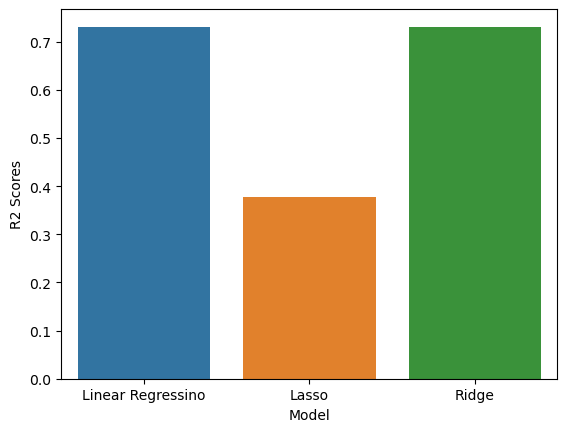

In [52]:
sns.barplot(x="Model", y="R2 Scores", data=models)